<a href="https://colab.research.google.com/github/vinelouzada/nlp/blob/main/NLP_Estudos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A ideia aqui é criar um modelo de Machine Learning que consiga realizar a tarefa de classificação, se um produto está sendo positivo ou negativo, para que com esses dados seja possível tomar ações para melhorar vendas, marketing e etc.

## Conhecendo o Dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/dataset_avaliacoes.csv")

In [4]:
#Primeiras linhas do dataset
df.head()

,ID_avaliacao,avaliacao,nota,sentimento
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo


In [5]:
#Informações de linhas x colunas do dataset
df.shape

(15501, 4)

In [6]:
#Quantidade de valores por sentimentos
df.value_counts('sentimento')

,count
sentimento,
positivo,7890
negativo,7611


## Transformando o dataset para que um algoritmo de Machine Learning consiga entender.

Transformando dados textuais em dados numéricos

### Aplicando Bag of Words

A técnica de Bag of Words traz algumas limitações: Não considera a ordem de palavras, logo, pode ignorar aspectos importantes do contexto e do significado do Texto

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

Para visualizar a matriz gerada, é necessário converte-lá em dataframe

In [ ]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa

,comprei,produto,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


Realizando com o dataframe real:


In [ ]:
vetorizar2 = CountVectorizer(lowercase=False, max_features=100)
bag_of_words = vetorizar2.fit_transform(df.avaliacao)

matriz_esparsa2 = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar2.get_feature_names_out())
matriz_esparsa2

,Comprei,Gostei,Muito,NÃO,Não,Produto,Recomendo,agora,ainda,antes,...,tenho,ter,tive,tudo,um,uma,uso,veio,ótima,ótimo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15498,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15499,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Treinando o modelo de Machine Learning

Precisamos separar os dados em dois conjuntos:

*   Dados de Treino
*   Dados de Teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, df.sentimento, random_state=4978)

### Usando o Algoritmo de Machine Learning Supervisionado de **Regressão Logistica**
É um algoritmo capaz de prever se um objeto é mais provável a pertencer a uma classe ou a outra.

In [ ]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)

LogisticRegression()

In [ ]:
# Aplicando acurácia para saber o quanto este modelo está acertando
acuraria = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia: {acuraria}')

Acurácia: 0.8534571723426213


## Como melhorar o modelo criado?
É necessário realizar algumas análises, por exemplo: criar uma nuvem de palavras

In [9]:
from wordcloud import WordCloud

todas_as_palavras = [texto for texto in df.avaliacao]
todas_as_palavras # cada linha vira um item do array

['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [11]:
todas_as_palavras = ' '.join([texto for texto in df.avaliacao])
todas_as_palavras # junta tudo em texto corrido

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancela

In [17]:
nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_as_palavras)

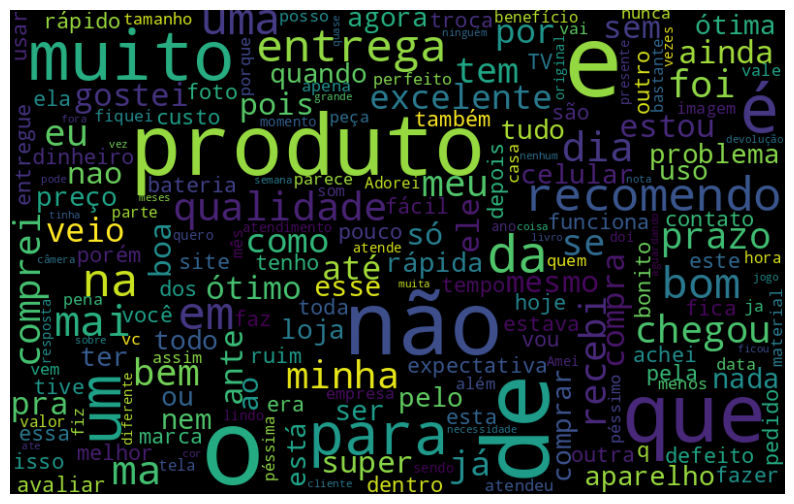

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_de_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

### Criando nuvem de palavras por sentimento: Positivo/Negativo

In [24]:
def nuvem_por_sentimento(texto, sentimento):
  todas_as_palavras_por_sentimento = texto.query(f"sentimento == '{sentimento}'")['avaliacao']
  todas_as_palavras = ' '.join(todas_as_palavras_por_sentimento)

  nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_as_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_de_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

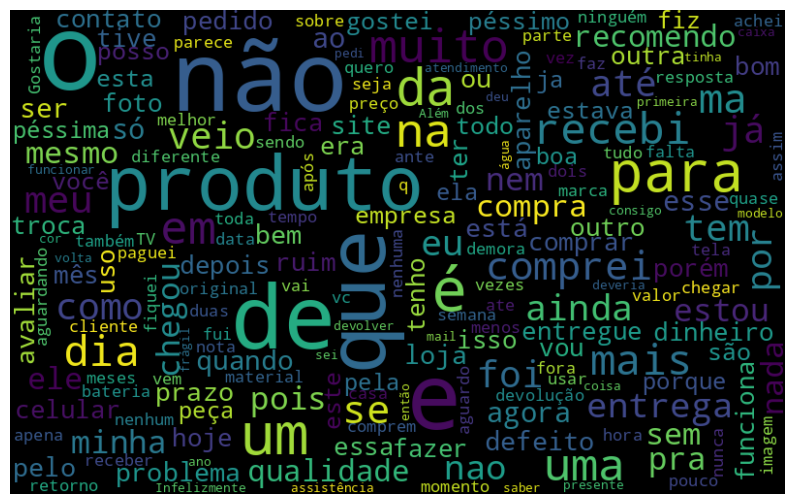

In [25]:
nuvem_por_sentimento(df, 'negativo')

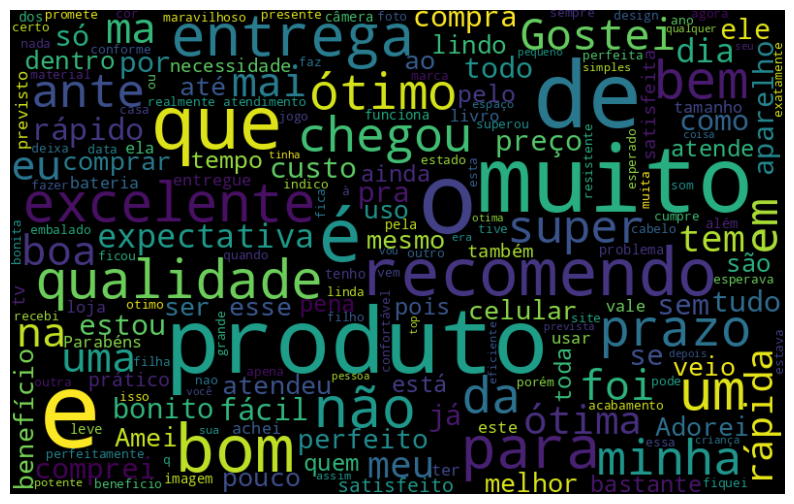

In [26]:
nuvem_por_sentimento(df, 'positivo')

### Obtendo a frequência por palavra
Aplicando a técnica de **tokenização**

Tokenização é o processo de dividir um texto em unidades menores chamadas tokens

In [27]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [29]:
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()
token_palavras = token_espaco.tokenize(todas_as_palavras)
#token_palavras

In [30]:
frequencia = nltk.FreqDist(token_palavras)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [31]:
# Transforma em DataFrame para melhorar a visualização
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})
df_frequencia.head()

,Palavra,Frequência
0,Esse,101
1,smartphone,33
2,superou,90
3,minhas,533
4,"expectativas,",79


In [32]:
df_frequencia.nlargest(columns='Frequência', n=10)

,Palavra,Frequência
8,e,11813
6,o,10865
29,de,10280
19,a,8873
46,que,7657
22,não,7286
163,é,4786
63,produto,4765
177,com,4641
130,do,4583


Vimos que há muitas palavras que não agregam muito para nossa analise, a ideia é remover essas palavras...

### Limpando e normalizando os dados Textuais